# EXERCICE 1

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error




In [50]:
# Chargement des données
data = pd.read_csv('C:/Users/BOCAR DIACK/Desktop/BMD ISE2/ISE2_2024-2025/SEMESTRE 1/MACHINE_LEARNING/PROJET-ML/billets.csv', sep=";")
data.shape
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [51]:
data_model = data.loc[lambda dfr: dfr.margin_low.notnull()]
data_model.info()
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data_model.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]  # ou data.drop(["margin_low", "is_genuine"], axis=1)
y = data_model.loc[:, 'margin_low']
# Définir la variable cible et les variables explicatives
#target = 'margin_low'
#features = ['length', 'height_left', 'height_right', 'margin_up', 'diagonal']

# Séparation des variables explicatives et de la variable cible
features = X 
target = y

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [52]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1024, 5) ; y: (1024,) 
Test set - X: (439, 5) ; y: (439,)


In [53]:
# Standardisons les données :

std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [54]:
# Entraînement et évaluation du modèle
def train_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    
    # Prédictions sur le jeu d'entraînement et de test
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calcul de l'erreur quadratique moyenne (RMSE) pour les deux jeux
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_error = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Coefficients des variables explicatives
    coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=["Coefficient"])
    
    return train_error, test_error, coefficients

In [55]:
# Normalisation des données (si nécessaire)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [56]:
from sklearn import linear_model  # Importation du module linear_model

# Modèle ElasticNet
model = linear_model.ElasticNet(fit_intercept=True, alpha=1., l1_ratio=0.5)

# Entraînement et évaluation du modèle
elastic_error = train_model(model=model, 
                            x_train=X_train_std, y_train=y_train,
                            x_test=X_test, y_test=y_test)

# Entraînement du modèle et évaluation
train_error, test_error, coefficients = train_model(model, X_train_std, y_train, X_test_std, y_test)

# Affichage des résultats
print(f"Erreur sur le jeu d'entraînement (RMSE) : {train_error:.4f}")
print(f"Erreur sur le jeu de test (RMSE) : {test_error:.4f}")
print("\nCoefficients des variables explicatives :")
print(coefficients)


Erreur sur le jeu d'entraînement (RMSE) : 0.6679
Erreur sur le jeu de test (RMSE) : 0.6534

Coefficients des variables explicatives :
              Coefficient
diagonal             -0.0
height_left           0.0
height_right          0.0
margin_up             0.0
length               -0.0


c:\Users\BOCAR DIACK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


## Obtenir les Statistiques Descriptives

In [57]:
# Liste des colonnes des variables explicatives
feature_names = ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']

# Afficher les statistiques descriptives pour les variables explicatives dans les jeux d'entraînement et de test
print("Statistiques descriptives pour le jeu d'entraînement :")
print(pd.DataFrame(X_train_std, columns=feature_names).describe())

print("\nStatistiques descriptives pour le jeu de test :")
print(pd.DataFrame(X_test_std, columns=feature_names).describe())


Statistiques descriptives pour le jeu d'entraînement :
           diagonal   height_left  height_right     margin_up        length
count  1.024000e+03  1.024000e+03  1.024000e+03  1.024000e+03  1.024000e+03
mean  -1.272212e-13 -1.526557e-15  1.703152e-14  3.564857e-16  2.862294e-15
std    1.000489e+00  1.000489e+00  1.000489e+00  1.000489e+00  1.000489e+00
min   -3.030330e+00 -2.718062e+00 -3.096393e+00 -2.588439e+00 -3.100547e+00
25%   -7.053947e-01 -6.944951e-01 -6.769649e-01 -7.250201e-01 -7.226474e-01
50%   -7.914122e-03  1.333691e-02 -3.200143e-03 -7.499041e-02  3.144607e-01
75%    7.227799e-01  6.795318e-01  7.318160e-01  6.617099e-01  7.527964e-01
max    3.080929e+00  2.811355e+00  3.151244e+00  3.261829e+00  1.884448e+00

Statistiques descriptives pour le jeu de test :
         diagonal  height_left  height_right   margin_up      length
count  439.000000   439.000000    439.000000  439.000000  439.000000
mean    -0.035302    -0.051765      0.004404   -0.060973   -0.003202
std  

## Visualiser les Distributions des Variables
Nous allons utiliser des histogrammes pour représenter et comparer les distributions des variables explicatives dans les deux ensembles. :

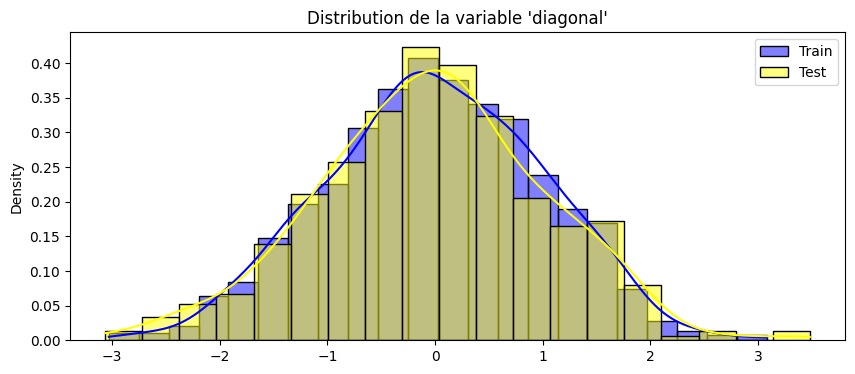

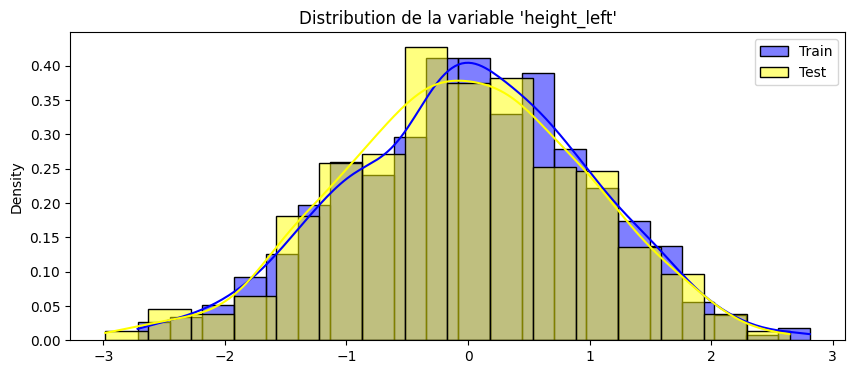

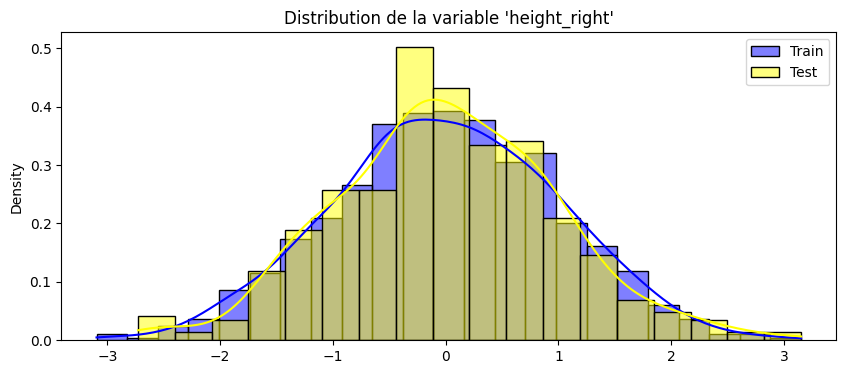

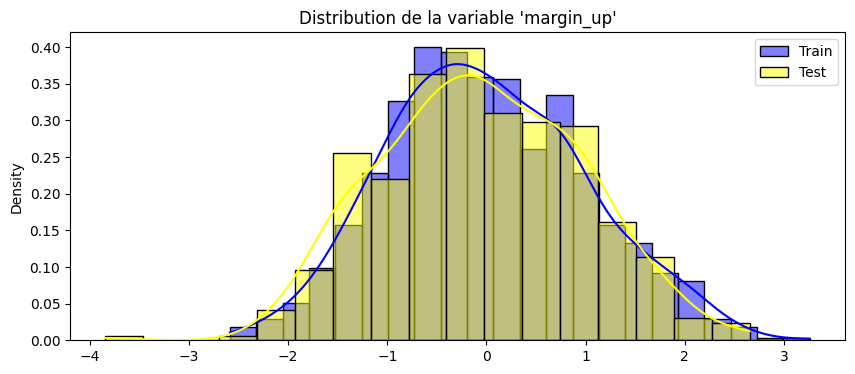

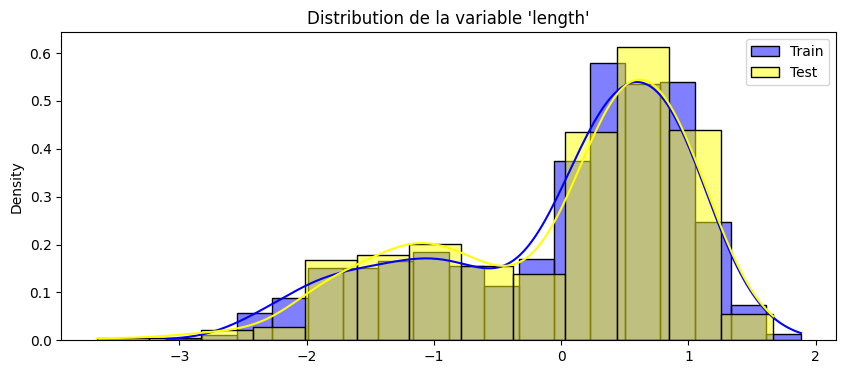

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation des distributions pour chaque variable
for i, feature in enumerate(feature_names):
    plt.figure(figsize=(10, 4))
    sns.histplot(X_train_std[:, i], color="blue", label="Train", kde=True, stat="density")
    sns.histplot(X_test_std[:, i], color="yellow", label="Test", kde=True, stat="density")
    plt.title(f"Distribution de la variable '{feature}'")
    plt.legend()
    plt.show()


Les distributions des variables montrent une bonne cohérence entre les ensembles d’entraînement et de test, avec des distributions généralement normales et centrées autour de zéro. La variable **diagonale** est bien superposée entre les deux ensembles, **height_left** et **height_right** présentent une légère asymétrie, et **margin_up** est un peu plus étalée. La variable **length** se distingue par une distribution bimodale, ce qui la rend plus complexe. Globalement, cette homogénéité entre les ensembles est favorable pour l’entraînement du modèle.

## Comparaison des Corrélations entre Variables Explicatives
Comparer les matrices de corrélation des deux ensembles de données peut révéler des différences dans la structure des relations entre les variables explicatives :

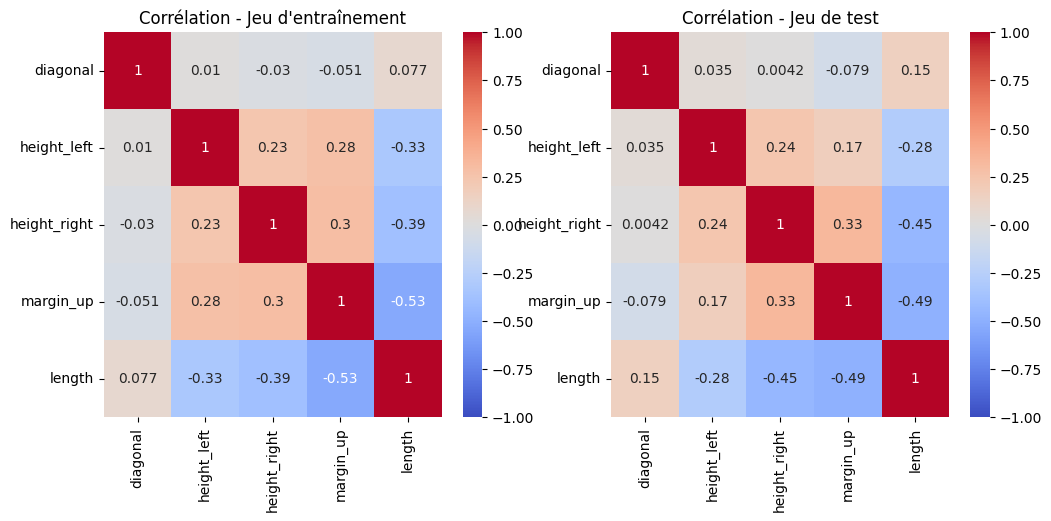

In [59]:
# Calculer et afficher les matrices de corrélation pour les jeux d'entraînement et de test
train_corr = pd.DataFrame(X_train_std, columns=feature_names).corr()
test_corr = pd.DataFrame(X_test_std, columns=feature_names).corr()

plt.figure(figsize=(12, 5))

# Matrice de corrélation pour le jeu d'entraînement
plt.subplot(1, 2, 1)
sns.heatmap(train_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélation - Jeu d'entraînement")

# Matrice de corrélation pour le jeu de test
plt.subplot(1, 2, 2)
sns.heatmap(test_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélation - Jeu de test")

plt.show()


L'analyse des matrices de corrélation pour les jeux d'entraînement et de test révèle plusieurs points clés. La variable 'diagonale' est très faiblement corrélée avec les autres, suggérant une indépendance relative. Les relations entre height_left, height_right et margin_up montrent des corrélations positives modérées, indiquant une relation logique entre ces dimensions. La variable 'longueur' présente des corrélations négatives  avec height_left, height_right et margin_up, particulièrement avec margin_up, suggérant qu'une augmentation de la longueur entraîne une diminution des autres mesures. Les corrélations sont stables et cohérentes entre les jeux d'entraînement et de test, avec de légères variations mais une structure globale similaire. En général, les corrélations sont faibles à modérées, sans redondance excessive, et les relations entre les variables sont robustes, ce qui suggère un bon équilibre dans les données et une bonne généralisabilité des résultats.

## Comparaison des Performances du Modèle sur les Jeux d'Entraînement et de Test
Enfin, si le modèle ElasticNet a déjà été entraîné, nous pouvons évaluer ses performances sur les jeux d'entraînement et de test afin d'observer si les différences entre les ensembles influencent les résultats.

In [60]:
from sklearn.metrics import mean_squared_error

# Prédictions sur le jeu d'entraînement et de test
train_predictions = model.predict(X_train_std)  
test_predictions = model.predict(X_test_std)    

# Calcul des erreurs
train_error = mean_squared_error(y_train, train_predictions)
test_error = mean_squared_error(y_test, test_predictions)

print(f"Erreur sur le jeu d'entraînement : {train_error}")
print(f"Erreur sur le jeu de test : {test_error}")


Erreur sur le jeu d'entraînement : 0.4460780868530273
Erreur sur le jeu de test : 0.42698000593598173


Erreur sur le jeu d'entraînement (0.446) et Erreur sur le jeu de test (0.427) : Bien que l'écart soit relativement faible, le modèle semble légèrement mieux ajusté au jeu de test, ce qui pourrait suggérer un sous-apprentissage ou une légère différence dans la distribution des données entre les deux jeux.

# EXERCICE 2

In [68]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error


# Regression Ridge

In [69]:
# Initialisation du modèle Ridge
ridge = Ridge()

# Définition de la grille de paramètres pour alpha (valeurs allant de 10^-4 à 10^4)
ridge_params = {'alpha': np.logspace(-4, 4, 50)}

# GridSearchCV pour trouver le meilleur alpha avec validation croisée à 5 plis
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

# Affichage du meilleur alpha trouvé
print("Best Ridge alpha:", ridge_grid.best_params_)
ridge_best = ridge_grid.best_estimator_  # Modèle Ridge optimisé


Best Ridge alpha: {'alpha': np.float64(7.9060432109076855)}


# Regression Lasso

In [70]:
# Initialisation du modèle Lasso
lasso = Lasso()

# Définition de la grille de paramètres pour alpha (mêmes valeurs que pour Ridge)
lasso_params = {'alpha': np.logspace(-4, 4, 50)}

# GridSearchCV pour trouver le meilleur alpha avec validation croisée à 5 plis
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)

# Affichage du meilleur alpha trouvé
print("Best Lasso alpha:", lasso_grid.best_params_)
lasso_best = lasso_grid.best_estimator_  # Modèle Lasso optimisé


Best Lasso alpha: {'alpha': np.float64(0.0001)}


# Regression ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialisation du modèle ElasticNet
elastic = ElasticNet()

# Définition de la grille de paramètres pour alpha et l1_ratio
elastic_params = {'alpha': np.logspace(-4, 4, 50), 'l1_ratio': np.linspace(0, 1, 10)}

# GridSearchCV pour trouver les meilleurs paramètres avec validation croisée
elastic_grid = GridSearchCV(elastic, elastic_params, scoring='neg_mean_squared_error', cv=5)
elastic_grid.fit(X_train, y_train)

# Affichage des meilleurs paramètres trouvés
print("Best ElasticNet alpha and l1_ratio:", elastic_grid.best_params_)
elastic_best = elastic_grid.best_estimator_  # Modèle ElasticNet optimisé


In [73]:
# Affichage des meilleurs paramètres trouvés
print("Best ElasticNet alpha and l1_ratio:", elastic_grid.best_params_)
elastic_best = elastic_grid.best_estimator_  # Modèle ElasticNet optimisé

Best ElasticNet alpha and l1_ratio: {'alpha': np.float64(0.013257113655901081), 'l1_ratio': np.float64(0.0)}


In [ ]:
# Évaluation des modèles optimisés sur l'ensemble de test

In [74]:
# Création d'un dictionnaire pour stocker les meilleurs modèles
models = {'Ridge': ridge_best, 'Lasso': lasso_best, 'ElasticNet': elastic_best}

# Boucle pour évaluer chaque modèle
for model_name, model in models.items():
    y_pred = model.predict(X_test)  # Prédictions sur l'ensemble de test
    mse = mean_squared_error(y_test, y_pred)  # Calcul de l'erreur quadratique moyenne
    print(f"{model_name} Test MSE: {mse}")  # Affichage de l'erreur pour chaque modèle


Ridge Test MSE: 0.21612211393634528
Lasso Test MSE: 0.216244855834948
ElasticNet Test MSE: 0.216161436106582


# Importance des variables dans chaque modèle

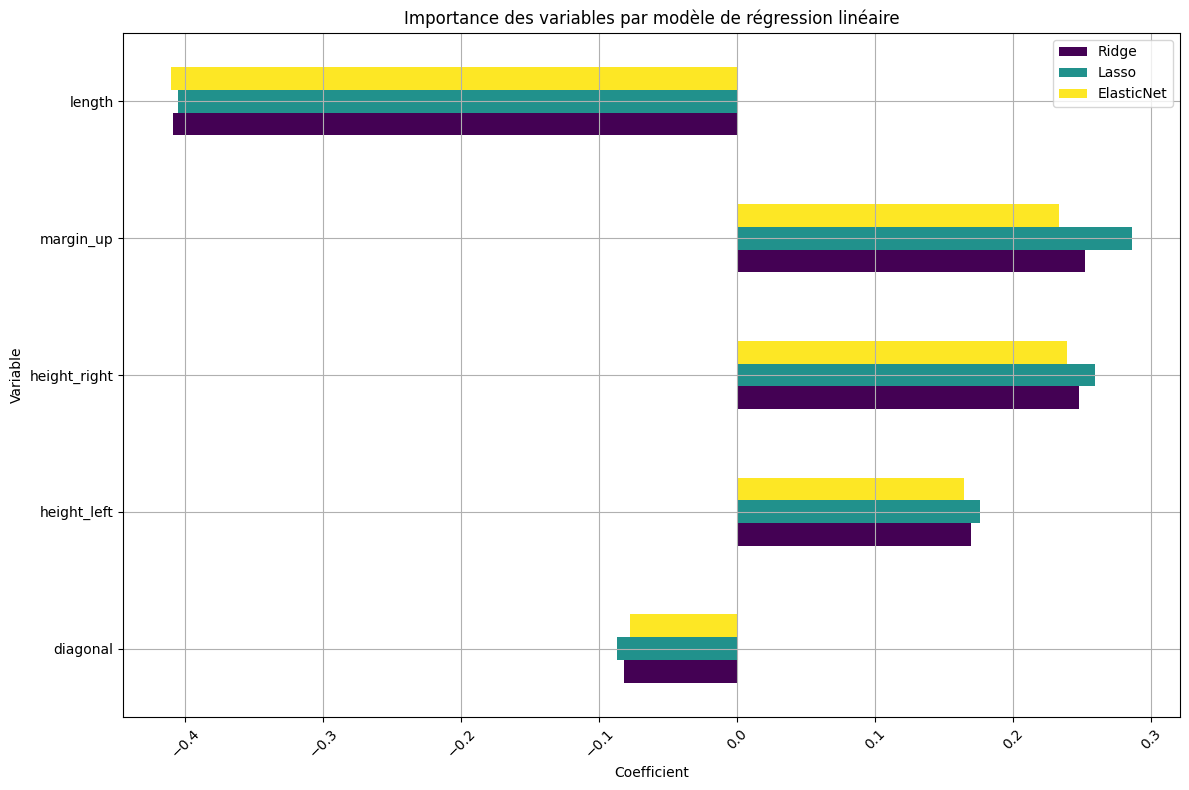

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
# Création d'un DataFrame pour stocker les coefficients des variables pour chaque modèle
coef_df = pd.DataFrame(index=X.columns)

# Boucle pour ajouter les coefficients de chaque modèle au DataFrame
for model_name, model in models.items():
    coef_df[model_name] = model.coef_

# Visualisation des coefficients sous forme de graphique en barres
coef_df.plot(kind='barh', figsize=(12, 8), colormap='viridis')  # Barres horizontales, couleurs personnalisées
plt.title('Importance des variables par modèle de régression linéaire')  # Titre plus précis
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.legend(loc='best')  # Légende
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x
plt.grid(True)  # Ajout d'une grille
plt.tight_layout()  # Améliore l'agencement du graphique

# Enregistrer le graphique
plt.savefig('coef_plot.png')
plt.show()

L'observation du graphe révèle une hiérarchie claire dans l'importance des variables, avec 'length' se démarquant comme la variable la plus influente, ayant un impact fortement négatif (coefficient ~-0,4). Les variables 'margin_up' et 'height_right' suivent en deuxième position avec des coefficients positifs significatifs (entre 0.2 et 0.3), tandis que 'diagonal' montre une influence minimale sur le modèle avec un coefficient proche de 0.05. Il est particulièrement remarquable que les trois modèles de régression (Ridge, Lasso et ElasticNet) s'accordent largement sur cette hiérarchie d'importance, ce qui renforce la robustesse de ces conclusions. Cette concordance entre les modèles suggère que ces relations sont stables et non dépendantes de la méthode de régularisation choisie.

# Conclusion

Les résultats des trois modèles de régularisation — Ridge, Lasso, et ElasticNet — montrent des performances similaires. Le modèle Ridge, avec un hyperparamètre alpha = 7.906, donne une erreur quadratique moyenne (MSE) de 0.2161 sur le jeu de test. Ce modèle est efficace pour des données avec de nombreuses caractéristiques, en réduisant l'impact des variables multicolinéaires sans les éliminer. Le modèle Lasso, avec un alpha = 0.0001, présente un MSE de 0.2162. Lasso est souvent utilisé pour la sélection de variables, et cet alpha très faible indique que presque toutes les variables sont retenues, rendant ses performances proches de celles de Ridge. Quant à ElasticNet, avec des hyperparamètres alpha = 0.0132 et l1_ratio = 0.0, il se comporte essentiellement comme un modèle Ridge, avec un MSE de 0.2162, similaire à ceux de Ridge et Lasso, sans apporter d'avantage significatif. Les MSE des trois modèles étant pratiquement identiques, cela suggère qu'aucun modèle ne se distingue nettement en termes de capacité de prédiction. Cependant, chaque modèle a ses avantages : Ridge est préféré pour réduire la multicolinéarité sans éliminer des variables, Lasso est utile pour la sélection de variables, même si dans ce cas l'effet est limité par un alpha faible, et ElasticNet combine les avantages des deux autres modèles mais n'a pas montré d'amélioration notable.